In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import FinanceDataReader as fdr
from statsmodels.tsa.stattools import adfuller

    ### 일별 수익률 계산

    price_df['daily_rtn'] = price_df['close'].pct_change()
    
    ### 누적곱 : cumprod()
    
    price_df['st_rtn'] = (1 + price_df['daily_rtn']).cumprod() 

In [95]:
kodex_200 = pd.read_csv('../헤커톤/KOdex_200.csv', encoding='euc-kr')
kodex_200.head()

,Date,Open,High,Low,Close,Volume,Change
0,2022-06-24,30732,31341,30633,31217,10474792,0.021064
1,2022-06-27,31451,31860,31166,31616,8591446,0.012781
2,2022-06-28,31655,31860,31491,31860,6761245,0.007718
3,2022-06-29,31486,31585,31296,31327,6191026,-0.016729
4,2022-06-30,31211,31211,30802,30808,7957762,-0.016567


In [96]:
kodex_200 = kodex_200.sort_values(by='Date')
kodex_200['Date'] = pd.to_datetime(kodex_200['Date'])
kodex_200.index = kodex_200['Date']
kodex_200.set_index('Date', inplace=True)
kodex_200.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-06-24,30732,31341,30633,31217,10474792,0.021064
2022-06-27,31451,31860,31166,31616,8591446,0.012781
2022-06-28,31655,31860,31491,31860,6761245,0.007718
2022-06-29,31486,31585,31296,31327,6191026,-0.016729
2022-06-30,31211,31211,30802,30808,7957762,-0.016567


<AxesSubplot:xlabel='Date'>

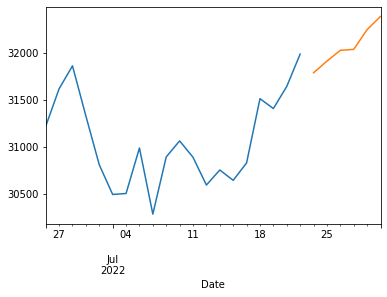

In [97]:
import matplotlib.pyplot as plt
y_train = kodex_200['Close'][:int(0.8*len(kodex_200))]
y_test = kodex_200['Close'][int(0.8*len(kodex_200)):]
y_train.plot()
y_test.plot()

<AxesSubplot:xlabel='Date'>

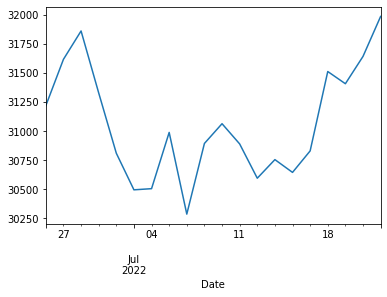

In [98]:
y_train.plot()

<AxesSubplot:xlabel='Date'>

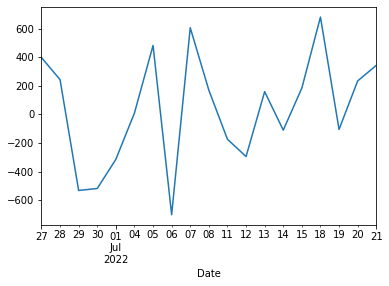

In [99]:
diff_1 = y_train.diff().dropna()
diff_1.plot()

<AxesSubplot:xlabel='Date'>

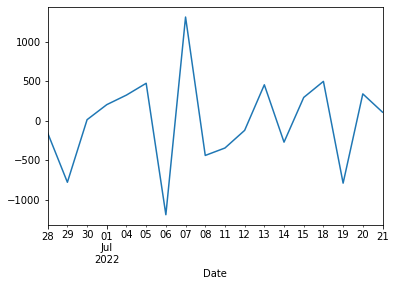

In [100]:
diff_2 = diff_1.diff().dropna()
diff_2.plot()

<AxesSubplot:xlabel='Date'>

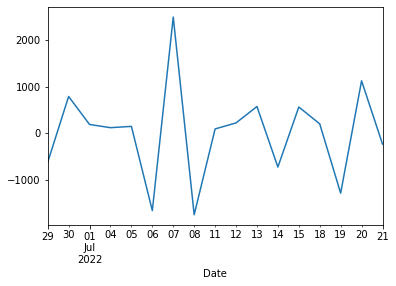

In [101]:
diff_3 = diff_2.diff().dropna()
diff_3.plot()

<AxesSubplot:xlabel='Date'>

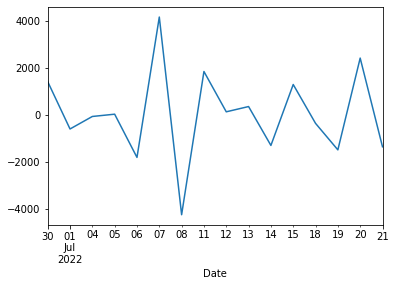

In [102]:
diff_4 = diff_3.diff().dropna()
diff_4.plot()

In [103]:
from statsmodels.tsa.stattools import adfuller
dataX = diff_2.values
fuller = adfuller(dataX)
print('ADF Statistic: %f' % fuller[0])
print('p-value: %f' % fuller[1])
print('Critical Values:')
for key, value in fuller[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.081100
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


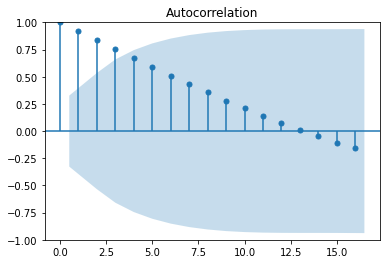

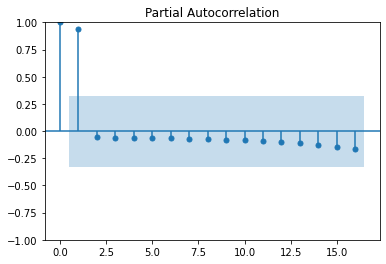

In [104]:
import numpy as np
lags=np.arange(len(diff_2)*2)
plot_acf(lags)
plot_pacf(lags)
plt.show()

In [105]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(y_train, order=(1,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   20
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -139.583
Date:                Mon, 01 Aug 2022   AIC                            283.167
Time:                        17:37:13   BIC                            284.948
Sample:                    06-24-2022   HQIC                           283.412
                         - 07-21-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0429      0.115     -0.373      0.709      -0.268       0.182
sigma2      3.098e+05   1.19e+05      2.593      0.010    7.56e+04    5.44e+05
Ljung-Box (L1) (Q):                   3.88   Jarque-

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


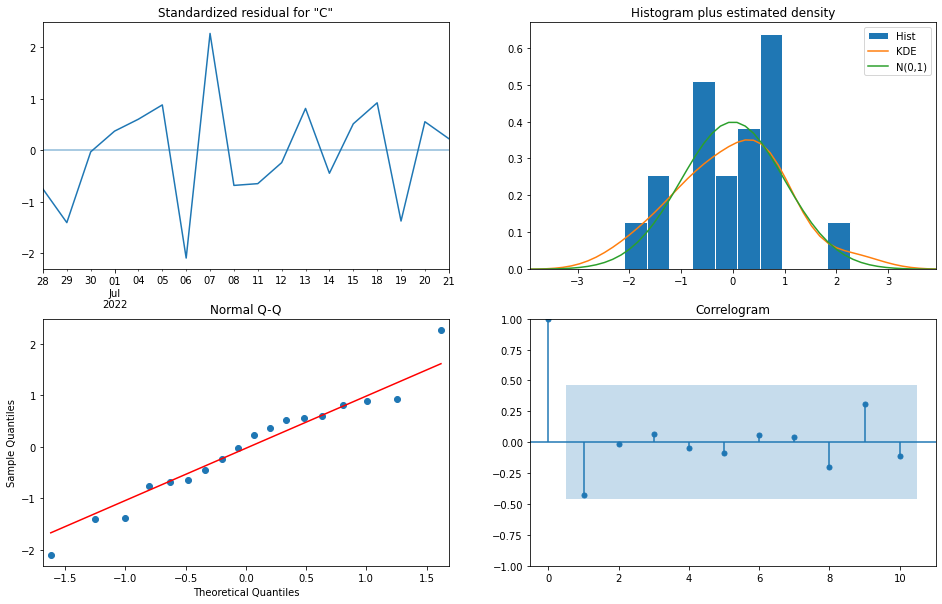

In [106]:
model_fit.plot_diagnostics(figsize=(16, 10))
plt.show()

In [107]:
pred = model_fit.forecast(steps=6).astype(int)
print(pred)

2022-07-22    32324
2022-07-25    32663
2022-07-26    33003
2022-07-27    33342
2022-07-28    33682
2022-07-29    34021
Freq: B, Name: predicted_mean, dtype: int32


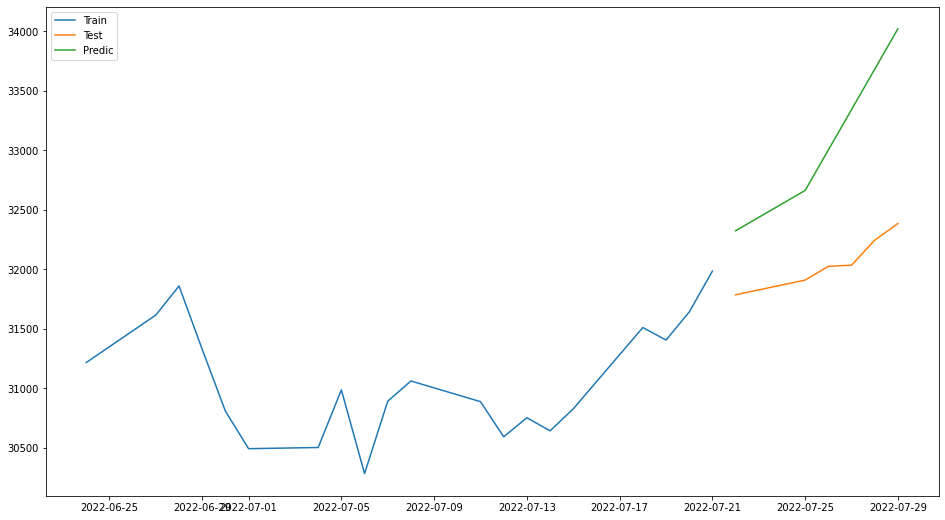

In [108]:
plt.figure(figsize=(16,9))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(pred, label='Predic')
plt.legend()

In [109]:
# MAPE지표로 모형 평가
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, pred):.3f}")

MAPE: 3.449


In [ ]:
asdasdasdasd
sasdasdasd
dasasdsad메롱
defdasasd
dadcn짱신기
dyfoddnjlyonㅋ_ㅋ